In [2]:
import numpy as np
import pandas as pd

In [3]:
df= pd.read_csv('Spam.csv', encoding='latin-1')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
#WE RENAME THE COLUMNS PROPERLY
df.rename(columns={'v1':'target','v2':'message'},inplace=True)


In [9]:
#WE IMPORT LABELENCODER
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()


In [10]:
df['target']=le.fit_transform(df['target'])

In [11]:
# Checking for missing values
df.isnull().sum()

target     0
message    0
dtype: int64

In [12]:
# Checking for duplicate values
df.duplicated().sum()

403

In [13]:
# remove the duplicated values
df=df.drop_duplicates(keep='first')

In [14]:
# Checking for the duplicate values once again
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5169, dtype: bool>

In [15]:
df.shape

(5169, 2)

## EXPLORATORY DATA ANALYSIS

In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

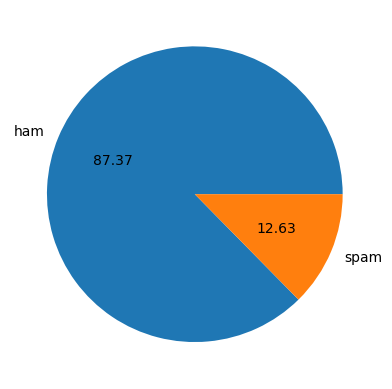

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [18]:
import nltk

In [19]:
%pip install nltk #installing the 

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



ERROR: Invalid requirement: '#installing'


In [20]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [21]:
df['characters']= df['message'].apply(len)# calculates the number of characters in a message


C:\Users\user\AppData\Local\Temp\ipykernel_11588\1996809169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['characters']= df['message'].apply(len)# calculates the number of characters in a message


In [22]:
df['words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))# calculates the number of words in each message.


C:\Users\user\AppData\Local\Temp\ipykernel_11588\4184059910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))# calculates the number of words in each message.


In [23]:
df['sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))# calculates the number of sentences in the message


C:\Users\user\AppData\Local\Temp\ipykernel_11588\272841580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))# calculates the number of sentences in the message


In [24]:
#number of characters,words and sentences for ham messages
df[df['target']==0][['characters','words','sentences']].describe()

,characters,words,sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
#number of characters,words and sentences for spam messages
df[df['target']==1][['characters','words','sentences']].describe()

,characters,words,sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='characters', ylabel='Count'>

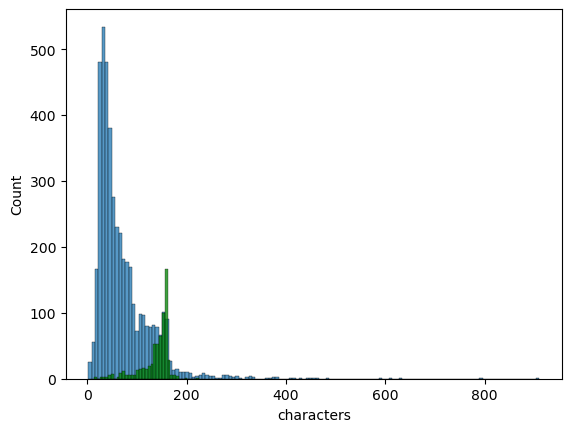

In [26]:
import seaborn as sns
# Relationship between number of characters in ham and spam
sns.histplot(df[df['target']==0]['characters'])
sns.histplot(df[df['target']==1]['characters'],color='green')

<Axes: xlabel='words', ylabel='Count'>

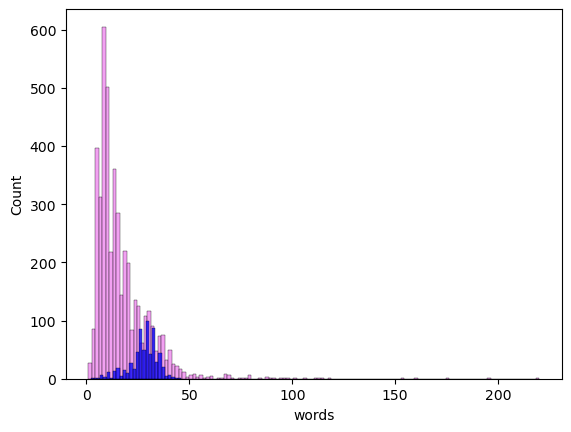

In [27]:
# Relationship between number of words in ham and spam
sns.histplot(df[df['target']==0]['words'],color='violet')
sns.histplot(df[df['target']==1]['words'],color='blue')

<Axes: xlabel='sentences', ylabel='Count'>

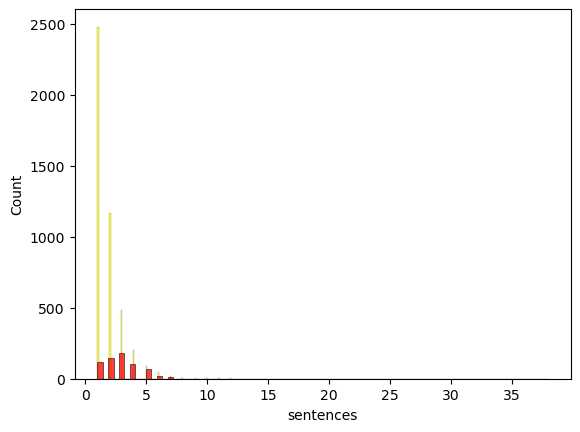

In [28]:
 # Relationship between number of sentences in ham and spam
sns.histplot(df[df['target']==0]['sentences'],color='yellow')
sns.histplot(df[df['target']==1]['sentences'],color='red')

C:\Users\user\AppData\Local\Temp\ipykernel_11588\1285309407.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='tab20',linecolor='grey',linewidths=2)


<Axes: >

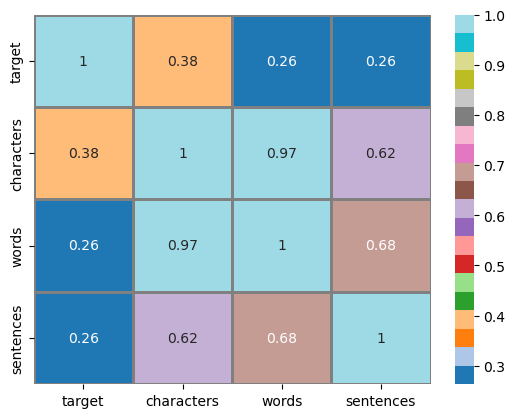

In [29]:
sns.heatmap(df.corr(),annot=True,cmap='tab20',linecolor='grey',linewidths=2)

## DATA PRE PROCESSING

In [30]:
# converting all characters to lowercase
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import string
def transform_message(message):
    message=message.lower()
    message=nltk.word_tokenize(message)
    # storing only alpha numeric characters of the message
    y=[]
    for i in message:
        if i.isalnum():
            y.append(i)
            
    message=y[:]        
    y.clear()
    
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    message=y[:]
    y.clear()
    
    for i in message:
        y.append(ps.stem(i))
                
    return " ".join(y)

In [31]:
df['transformed_message']=df['message'].apply(transform_message)

C:\Users\user\AppData\Local\Temp\ipykernel_11588\4250869063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_message']=df['message'].apply(transform_message)


In [32]:
%pip install wordcloud
#from wordcloud import WordCloud
#wc=WordCloud(width='100',height='100',min_font_size='20',background_color='pink')

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:

#spam_wc= wc.generate(df[df['target']== 1]['transformed_message'].str.cat(sep=" "))

In [34]:
from wordcloud import WordCloud

# Filter the DataFrame to select rows where 'target' is equal to 1
filtered_df = df[df['target'] == 1]
filter_df = df[df['target'] == 0]

# Concatenate the 'transformed_message' column into a single string
text_to_generate_wordcloud = filtered_df['transformed_message'].str.cat(sep=" ")
text_to_generate_wordclo = filter_df['transformed_message'].str.cat(sep=" ")


# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=800).generate(text_to_generate_wordcloud)
wordcloud1 = WordCloud(width=800, height=800).generate(text_to_generate_wordclo)

# Display or save the word cloud as needed
spam_wc= wordcloud
ham_wc=wordcloud1

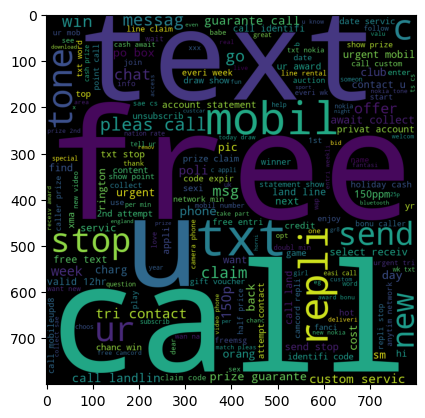

In [35]:
plt.imshow(spam_wc)

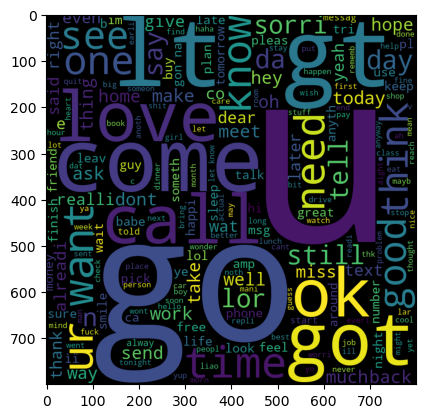

In [36]:
plt.imshow(ham_wc)

In [37]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_message'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [42]:
print('the number of words in spam are:',(len(spam_corpus)))

the number of words in spam are: 9939


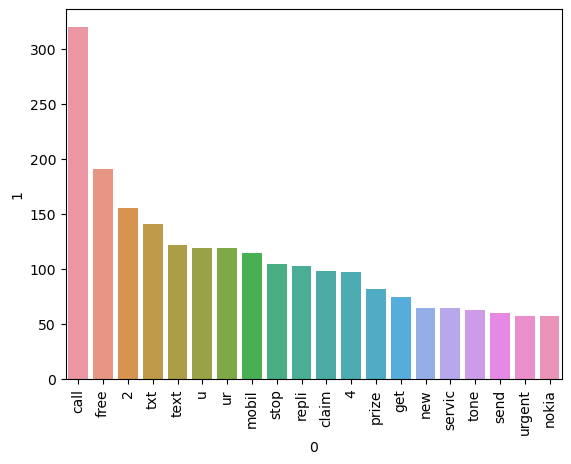

In [56]:
#This code basically counts the number of times each word of a spam message is occuring
from collections import Counter
Counter(spam_corpus)
#prints the most common 30 words
sns.barplot(x=(pd.DataFrame(Counter(spam_corpus).most_common(20))[0]),y=(pd.DataFrame(Counter(spam_corpus).most_common(20))[1]))
plt.xticks(rotation='vertical')
plt.show()

In [60]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_message'].tolist():
    for words in msg.split():
        ham_corpus.append(words)
print('the number of words in spam are:',(len(ham_corpus)))       

the number of words in spam are: 35404


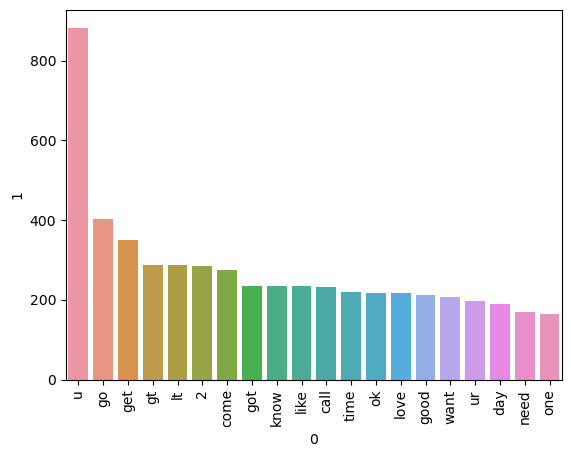

In [61]:
#This code basically counts the number of times each word of a spam message is occuring
from collections import Counter
Counter(ham_corpus)
#prints the most common 30 words
sns.barplot(x=(pd.DataFrame(Counter(ham_corpus).most_common(20))[0]),y=(pd.DataFrame(Counter(ham_corpus).most_common(20))[1]))
plt.xticks(rotation='vertical')
plt.show()

## MODEL BUILDING

In [62]:
df.head()

,target,message,characters,words,sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [84]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [85]:
x=tfidf.fit_transform(df['transformed_message']).toarray()
x.shape

(5169, 3000)

In [86]:
y=df['target'].values

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2529)

In [89]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [90]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [91]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print('accuracy score using gnb is:',accuracy_score(y_test,y_pred1))
print('precision score of Gaussian Naive Bayes:',precision_score(y_test,y_pred1))

mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print('accuracy score using gnb is:',accuracy_score(y_test,y_pred2))
print('precision score of Multinomial Naive Bayes:',precision_score(y_test,y_pred2))


bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print('accuracy score using gnb is:',accuracy_score(y_test,y_pred3))
print('precision score of Bernoulli Naive Bayes:',precision_score(y_test,y_pred3))




accuracy score using gnb is: 0.8607350096711799
precision score: 0.5019305019305019
accuracy score using gnb is: 0.9661508704061895
precision score: 1.0
accuracy score using gnb is: 0.9777562862669246
precision score: 0.9765625


In [93]:
print('the Multinomial Naive Bayes Model provides the maximum precision')

the Multinomial Naive Bayes Model provides the maximum precision
